##In this file we are using the casia_b dataset running on Resnet50 model for to check how much accuracte the model in this model

Mounting the drive to get the slipted data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Unzipping the folder

In [2]:
!unzip -q "/content/drive/MyDrive/dataset/Data Folder1.zip"

Importing the library for the loading and model building

In [3]:
import os
import math
import tensorflow as tf
import glob
import cv2
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import tensorflow.keras as keras
from tensorflow.keras import models,layers,optimizers,datasets
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import np_utils
from keras.models import load_model
from keras.preprocessing import image
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
import os

Generating the images for to boosting the accuracy for the CAISA_B dataset

In [4]:
# Read input images and assign labels based on folder names
print(os.listdir("/content/Data Folder/"))

SIZE = 256  #Resize images

['train', 'val', '.DS_Store']


In [5]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

from keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(validation_split=0.2, preprocessing_function=preprocess_input)
train_flow = train_gen.flow_from_directory("/content/Data Folder/train/", target_size=(256, 256), batch_size=130, subset="training")
valid_flow = train_gen.flow_from_directory("/content/Data Folder/val/", target_size=(256, 256), batch_size=130, subset="validation")

Found 28891 images belonging to 3 classes.
Found 3095 images belonging to 3 classes.


Importing the pretrain model ResNet50 and using the input shape as (256,256,3)

Also we are using the Globalaveragemaxpooling and batchnormalization for the layer building for accurate the result.

Using RMSPROP as optimizer with categorial crossentropy with learning rate=1e-4

In [6]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet_v2 import ResNet152V2 
from keras.layers import GlobalAveragePooling2D, BatchNormalization, Dropout, Dense
from keras.models import Model


res = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3)) 

for layer in res.layers: 
  layer.trainable = False

x = res.output 
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(3, activation='softmax')(x)

model = Model(res.input, x) 
opt = tf.keras.optimizers.RMSprop(
    learning_rate=1e-4 ,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop"
)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) 

model.summary() 

94781440/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                             

Fitting the model for the train and test flow of the data that we slipted in pretraining of the model

In [7]:
resnet50Hist = model.fit_generator(train_flow, epochs=10, validation_data=valid_flow)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
223/223 [==============================] - 276s 1s/step - loss: 1.2771 - accuracy: 0.5309 - val_loss: 0.8110 - val_accuracy: 0.6527
Epoch 2/10
223/223 [==============================] - 253s 1s/step - loss: 0.9593 - accuracy: 0.6383 - val_loss: 0.7953 - val_accuracy: 0.6805
Epoch 3/10
223/223 [==============================] - 253s 1s/step - loss: 0.8244 - accuracy: 0.6800 - val_loss: 0.7686 - val_accuracy: 0.7015
Epoch 4/10
223/223 [==============================] - 252s 1s/step - loss: 0.7470 - accuracy: 0.7117 - val_loss: 0.7244 - val_accuracy: 0.7208
Epoch 5/10
223/223 [==============================] - 253s 1s/step - loss: 0.6987 - accuracy: 0.7259 - val_loss: 0.7297 - val_accuracy: 0.7189
Epoch 6/10
223/223 [==============================] - 252s 1s/step - loss: 0.6689 - accuracy: 0.7327 - val_loss: 0.6862 - val_accuracy: 0.7286
Epoch 7/10
223/223 [==============================] - 252s 1s/step - loss: 0.6374 - accuracy: 0.7458 - val_loss: 0.6860 - val_accuracy: 0.7247

Ploting the graph of the accuracy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'lower_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


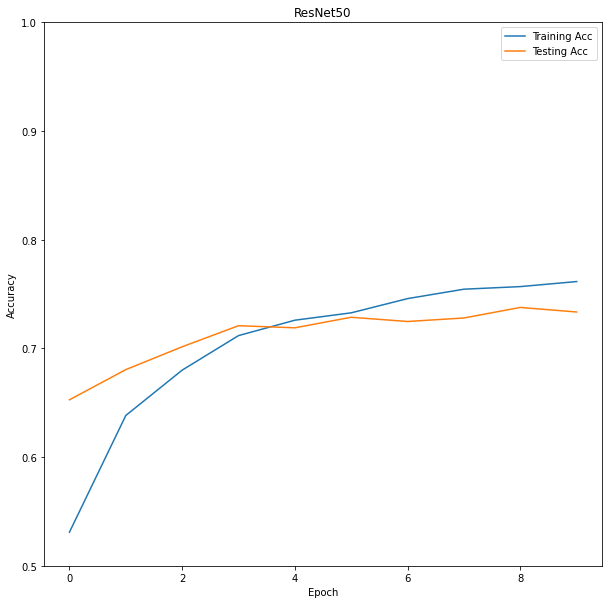

In [9]:
plt.figure(figsize=(10,10))
plt.title("ResNet50")
plt.plot(resnet50Hist.history['accuracy'], label='Training Acc')
plt.plot(resnet50Hist.history['val_accuracy'],label='Testing Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower_right')
plt.savefig('resnet50.png', dpi=300, bbox_inches='tight')